<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/short_essay_scoring_horreursansnom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [1]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [2]:
####################################################
#Data loading and basic modification
df = pd.read_csv("short_essay_scoring.csv")
df.drop(['Unnamed: 0'],inplace = True,axis = 1)
df['score'] = df['score']/10
print ('the data frame has a shape :', df.shape)
df.head()

the data frame has a shape : (1500, 5)


,answer,question_text,text_id,grade,score
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,0.7
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,0.9
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,0.8
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,0.9
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,0.3


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [3]:
#we are going to use nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams

In [92]:
# Explanation of the usefulness of tokenizer. 
sentence = 'This is a great sentence because i wrote it. We\'ll see how this goes. Harry Potter said "I love Quiddich."'
print(sentence.split(" "))
tokens = word_tokenize(sentence)
print(tokens)
print(len(tokens))

['This', 'is', 'a', 'great', 'sentence', 'because', 'i', 'wrote', 'it.', "We'll", 'see', 'how', 'this', 'goes.', 'Harry', 'Potter', 'said', '"I', 'love', 'Quiddich."']
['This', 'is', 'a', 'great', 'sentence', 'because', 'i', 'wrote', 'it', '.', 'We', "'ll", 'see', 'how', 'this', 'goes', '.', 'Harry', 'Potter', 'said', '``', 'I', 'love', 'Quiddich', '.', "''"]
26


In [90]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize
sents = sent_tokenize('This is a great sentence because i wrote it. We\'ll see how this goes. Harry Potter said "I love Quiddich."')
sents
print(sents)

['This is a great sentence because i wrote it.', "We'll see how this goes.", 'Harry Potter said "I love Quiddich."']


In [91]:
# PART OF SPEECH TAGGING
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('grfdfeat', 'NN'),
 ('sentence', 'NN'),
 ('because', 'IN'),
 ('i', 'NN'),
 ('wrote', 'VBD'),
 ('it', 'PRP'),
 ('.', '.'),
 ('We', 'PRP'),
 ("'ll", 'MD'),
 ('see', 'VB'),
 ('how', 'WRB'),
 ('this', 'DT'),
 ('goes', 'VBZ'),
 ('.', '.'),
 ('Harry', 'NNP'),
 ('Potter', 'NNP'),
 ('said', 'VBD'),
 ('``', '``'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('Quiddich', 'NNP'),
 ('.', '.'),
 ("''", "''")]

In [7]:
# STOPWORDS
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# NGRAMS
from nltk import ngrams
#n for number
#g for group of words 
#unigram 1 word bigram 2 word etc...
n = 5
question = " Who is the main character?"
answer = "The main character is Harry Potter"

question_gram = ngrams( word_tokenize(question), n)
answer_gram = ngrams( word_tokenize(answer), n)

print(list(question_gram))
print(list(answer_gram))

[('Who', 'is', 'the', 'main', 'character'), ('is', 'the', 'main', 'character', '?')]
[('The', 'main', 'character', 'is', 'Harry'), ('main', 'character', 'is', 'Harry', 'Potter')]


In [83]:
# TFIDF 
#it's a way to mesure word rarity within a context
# term frequency / document frequency
#term frequency the amount of time a word appear in a sentence
# DOcument frequency : amount of document that have the word
from sklearn.feature_extraction.text import TfidfVectorizer

      

In [80]:
print(plop)
print(len(plop))

[2.3887635718032207, 3.9252890886004725, 2.9372591100282306, 2.757002874132288, 1.373611517606661, 2.738258624761115, 4.601599988666146, 2.445061201591452, 3.1177454147232644, 3.056244899163435, 3.430054596784085, 4.231045177847301, 1.8964959386763898, 3.195064083444266, 3.622693849281395, 3.247303560651371, 3.296966439801478, 2.8148443182514424, 1.2727842617879292, 2.95299700049197, 3.264815461725133, 2.2868687543570183, 3.2121536227440846, 3.554093257480304, 2.6915619067780594, 4.584905984832464, 1.0, 2.3881689499206917, 1.3968877468872045, 3.833429607084875, 3.373976558690125, 2.1535971698614667, 5.032502071095541, 2.9321542255200095, 3.3144368247632605, 4.106936518009972, 2.590540290126433, 6.888930168167984, 4.021016847735709, 3.0350078224153223, 1.9983777864308436, 1.0, 1.7638424022165358, 2.1877994634129125, 2.3684511660103067, 2.3284279779540693, 3.2544002064736066, 1.9643301465888667, 3.4504088299420492, 2.7679920280764754, 4.0376546603590935, 4.431995646499474, 2.739945562355

In [10]:
answer_vectorizer = TfidfVectorizer(stop_words="english")
M =answer_vectorizer.fit_transform(df['answer'])

for r in range(len(corpus)):
  print("\nROW " + str(r) + " - " + df['answer'][r])
  for z in zip(answer_vectorizer.get_feature_names(), M[r,:].toarray()[0]):
    if z[1] > 0:
      print(z)

################################################################################
print(M.toarray()[0])
print(M.shape)
print(M.toarray()[0].shape)


ROW 0 - Destiny would be a good friend beacu like to read too an destiny like too where about the the same size
('beacu', 0.41689663418810785)
('destiny', 0.6967271333514743)
('friend', 0.22398519764018768)
('good', 0.20685734410155865)
('like', 0.28966144324996174)
('read', 0.2062722525961937)
('size', 0.34836356667573715)

ROW 1 - I think Mr.Popper would disagree because he was not absent minded in the middle of the story. As he was busy with the penguins in the basement ice rink where Billy and Janie were playing with all of the 12 penguins.
('12', 0.24494770466069782)
('absent', 0.24494770466069782)
('basement', 0.23518133154495832)
('billy', 0.2276059440279937)
('busy', 0.25871263445784987)
('disagree', 0.20083900404615246)
('ice', 0.22141640174780627)
('janie', 0.25871263445784987)
('middle', 0.20083900404615246)
('minded', 0.23518133154495832)
('mr', 0.19265191540291532)
('penguins', 0.47036266308991664)
('playing', 0.1903097113179501)
('popper', 0.25871263445784987)
('rink', 0

## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [11]:
df['length'] = [len(answer) for answer in df.answer]

Text(0.5, 1.0, 'Char Length vs. Score')

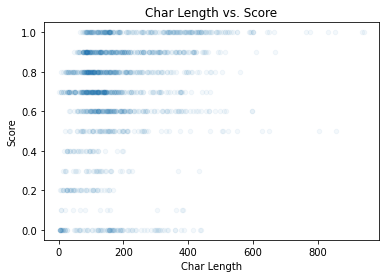

In [12]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [13]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [14]:
print(np.array(df['length']).reshape(-1,1))

[[103]
 [215]
 [149]
 ...
 [ 66]
 [107]
 [ 84]]


In [15]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))
print ('mse = {}'.format(mean_squared_error(predictions, y_test)))
print('mae = {}'.format(mean_absolute_error(predictions, y_test)))

train score = 0.0750142588037207
test score = 0.013233546425281628
mse = 0.06820749008542583
mae = 0.20294926905567431


## 4. Feature Engineering for linear regression
Create at least 3 different features

In [16]:
df.head()

,answer,question_text,text_id,grade,score,length
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,0.7,103
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,0.9,215
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,0.8,149
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,0.9,146
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,0.3,44


In [84]:
## USAGE OF TDFI FEATURES 
#let's take the mean of the tf idf for each answer so we will have a feature giving us an overall idea of the richness of the children vocabulary
from sklearn.model_selection import train_test_split

answer_vectorizer = TfidfVectorizer(stop_words="english")
X1 =answer_vectorizer.fit_transform(df['answer'])
y = df["score"]

plop = []
for r in range(len(df.answer)):
  #print("ROW " + str(r) + " - " + df.answer[r])
  x = 0
  y = 0
  for z in zip(answer_vectorizer.get_feature_names(), M[r,:].toarray()[0]):
    if z[1] > 0:
      x += z[1]
      y += 1
      #print(z[1])  
    else:
      y=1  
  plop.append(x/y)  

df['word_rarity'] = plop

In [85]:
############################################################
#After looking the data i found that lenght alone was not enough, because the younger ones write less words but still deserve a good grade
#let's correlate the number of word per answer with the grade as a first feature

df['wordcount'] = [len(word_tokenize(answer)) for answer in df.answer]
df['wordcountovergrade'] = df['wordcount']/df['grade']

In [134]:
from textblob import TextBlob

In [160]:
from spellchecker import SpellChecker

In [157]:
##########################################################
#let's try to have an idea of the number of mistake per answer a children made
# import the textblob
from textblob import Word
plip = []
for i in df.answer:
  patate = TextBlob(i).words
  v = 0.0001
  g = 0.0001
  for u in patate:
    if u.spellcheck()[0][1] < 1:
      g += 1
      v = v + u.spellcheck()[0][1]
    plip.append(v/g)
     





KeyboardInterrupt: ignored

In [176]:
spell = SpellChecker()
#for i in range(1500):
spell.unknown(word_tokenize(df.answer[3]))


{'cave.a'}

In [159]:
print(plip)
print(len(plip))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 0.6000399960003999, 1.0, 1.0, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 9.999000099990002e-05, 0.20219087287621143, 0.20219087287621143, 0.20219087287621143, 0.20219087287621143, 0.20219087287621143, 0.20219087287621143, 0.13479616174117878, 0.13479616174117878, 0.13479616174117878, 0.13479616174117878, 0.13479616174117878, 0.16138584563131095, 0.16138584563131095, 0.29160607210051936, 0.29160607210051936,

## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

In [180]:
## YOUR CODE HERE

'A part that I could not stop reading was when they were in the cave.A part that was boring was when they were going downstairs to the magic mirror'

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

## 6. Model Training
Pick a model, fit your features and print performance metrics

In [ ]:
## YOUR CODE HERE FOR MODEL TRAINING

In [ ]:
## YOUR CODE HERE FOR PRINTING PERFORMANCES

## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

In [ ]:
## CODE

In [ ]:
## Written interpretation. I think length helped the model but we could have better results by..


## 8. Second interation improvement


In [ ]:
## NEW FEATURE ENGINEERING

In [ ]:
## NEW MODEL TRAINING

In [ ]:
## NEW PERFORMANCE ASSESMENT